# Plotting points into a map (PRACTICE)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data Extract from the file

In [11]:
data = pd.read_csv('DataScraper.csv')
data.pop('Unnamed: 0');
data.head(3)

,longitude,latitude,id,created_at,updated_at,deleted_at,origin,title,address,neighborhood,...,sector_zona_industrial,sector_zona_residencial,url,watch,property_is_new,property_type,property_subtype,phone,whatsapp_phone,property_price_type
0,-73.114998,7.084000,28683,2019-02-03 02:42:15.379278+00:00,2019-03-18 21:00:09.646665+00:00,NaN,Olx,VENTA DE APARTAMENTO PROVENZA BUCARAMANGA.cod637,NaN,"Bucaramanga, Santander",...,False,False,https://bucaramanga.olx.com.co/venta-de-aparta...,False,False,Apartamento,Apartamento,NaN,NaN,NaN
1,-73.115562,7.125080,29781,2019-02-03 03:24:20.345645+00:00,2019-04-02 00:13:27.035516+00:00,NaN,FincaRaiz,Apartaestudio en Venta Bucaramanga La Aurora,NaN,NaN,...,False,False,https://www.fincaraiz.com.co/apartaestudio-en-...,False,False,Apartamento,Apartaestudio,NaN,NaN,NaN
2,-73.099182,7.071762,54255,2019-05-18 16:03:09.671033+00:00,2019-06-14 21:00:12.054522+00:00,NaN,Olx,Se Sede Local en La Cumbre,NaN,"Floridablanca, Santander",...,False,False,https://floridablanca.olx.com.co/se-sede-local...,False,False,Local,Local,NaN,NaN,NaN


In [12]:
coordinates = data[['longitude', 'latitude']]

In [2]:
# Coordenadas Bucaramanga-Floridablanca
BBox = (-73.1478, -73.0663, 7.0496, 7.1673)
BBox

(-73.1478, -73.0663, 7.0496, 7.1673)

In [13]:
bga_map = plt.imread('map.png')

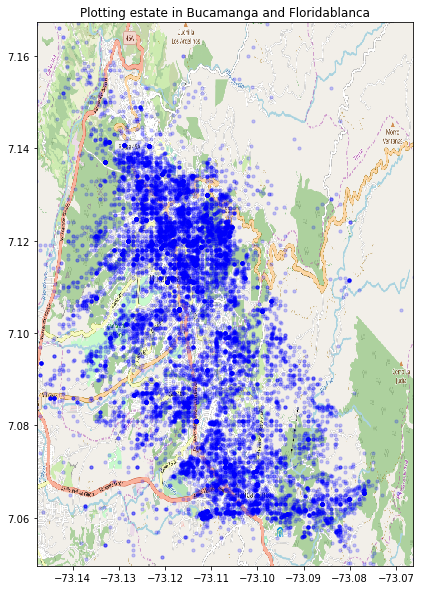

In [20]:
fig, ax = plt.subplots(figsize=(16,10))

ax.scatter(coordinates['longitude'], coordinates['latitude'], zorder=1, alpha=0.2, c='b', s=10)

ax.set_title('Plotting estate in Bucamanga and Floridablanca')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])

ax.imshow(bga_map, zorder=0, extent=BBox, aspect='equal')

In [21]:
coordinates_price = coordinates.copy()

In [22]:
coordinates_price['price'] = data['property_price']

In [24]:
coordinates_price['color'] = 'b'

In [27]:
print('Min:', coordinates_price['price'].min())
print('Max:', coordinates_price['price'].max())
print('Mean:', coordinates_price['price'].mean())

Min: 1.0
Max: 22222222222222.0
Mean: 2213495322.204816


In [33]:
coordinates_price['color'] = coordinates_price['price'].apply(lambda x: '#F6FF33' if x < 100000000 else '#FAC128' if x > 100000000 and x < 250000000 else 'r')

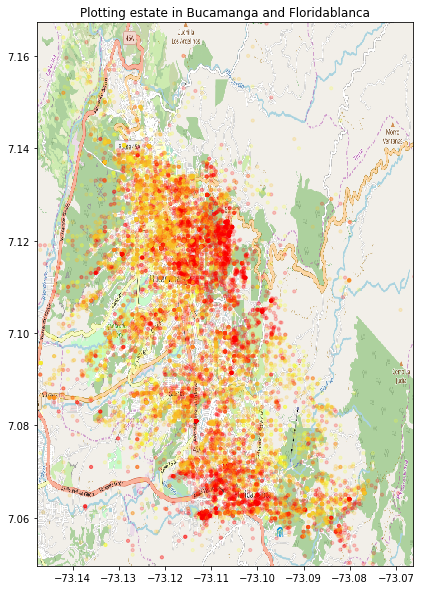

In [34]:
fig, ax = plt.subplots(figsize=(16,10))

ax.scatter(coordinates_price['longitude'], coordinates_price['latitude'], zorder=1, alpha=0.2, c=coordinates_price['color'], s=10)

ax.set_title('Plotting estate in Bucamanga and Floridablanca')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])

ax.imshow(bga_map, zorder=0, extent=BBox, aspect='equal')

In [35]:
bw_img = bga_map.copy()

In [39]:
bw_img.mean()

0.8987533

In [41]:
BBox = (-73.1892, -73.0193, 6.9639, 7.1675)
all_map = plt.imread('map2.png')

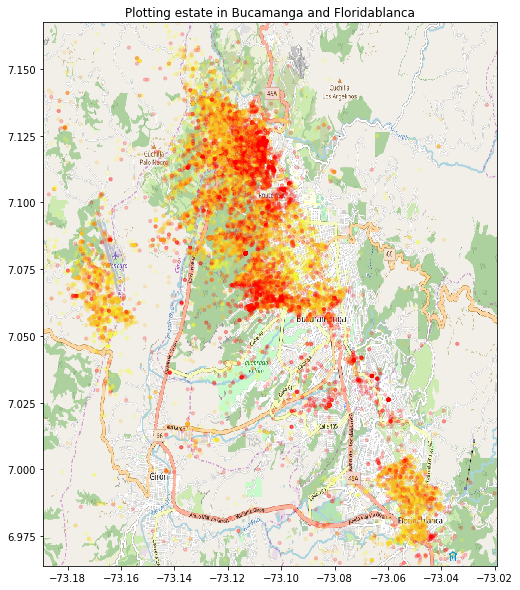

In [42]:
fig, ax = plt.subplots(figsize=(16,10))

ax.scatter(coordinates_price['longitude'], coordinates_price['latitude'], zorder=1, alpha=0.2, c=coordinates_price['color'], s=10)

ax.set_title('Plotting estate in Bucamanga and Floridablanca')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])

ax.imshow(all_map, zorder=0, extent=BBox, aspect='equal')

Other map

In [49]:
BBox = (-73.2321, -72.8579, 6.9234, 7.1700)
map3 = plt.imread('map3.png')

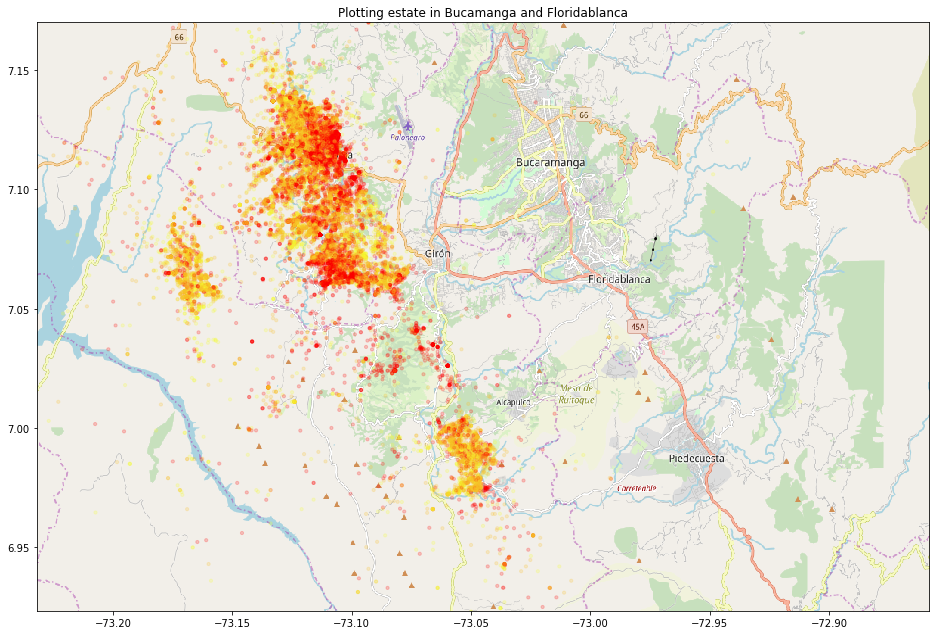

In [50]:
fig, ax = plt.subplots(figsize=(16,20))

ax.scatter(coordinates_price['longitude'], coordinates_price['latitude'], zorder=1, alpha=0.2, c=coordinates_price['color'], s=10)

ax.set_title('Plotting estate in Bucamanga and Floridablanca')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])

ax.imshow(map3, zorder=0, extent=BBox, aspect='equal')

# With another Data (Pre-processed)

In [51]:
data = pd.read_csv('DataScraper2.csv')
data.pop('Unnamed: 0');
data.head(3)

,longitude,latitude,created_at,updated_at,origin,address,neighborhood,label_date_display,type_of_seller,property_price,...,sector_zona_industrial,sector_zona_residencial,url,property_is_new,property_type,property_subtype,phone,whatsapp_phone,property_price_type,city
0,-73.114998,7.084000,2019-02-03 02:42:15.379278+00:00,2019-03-18 21:00:09.646665+00:00,Olx,NaN,"Bucaramanga, Santander",2019-02-03 02:42:15.373547+00:00,Inmobiliaria,190000000.0,...,False,False,https://bucaramanga.olx.com.co/venta-de-aparta...,False,Apartamento,Apartamento,NaN,NaN,NaN,bucaramanga
1,-73.115562,7.125080,2019-02-03 03:24:20.345645+00:00,2019-04-02 00:13:27.035516+00:00,FincaRaiz,NaN,aurora,2019-02-03 03:24:20.338800+00:00,Inmobiliaria,80000000.0,...,False,False,https://www.fincaraiz.com.co/apartaestudio-en-...,False,Apartamento,Apartaestudio,NaN,NaN,NaN,bucaramanga
2,-73.099182,7.071762,2019-05-18 16:03:09.671033+00:00,2019-06-14 21:00:12.054522+00:00,Olx,NaN,"Floridablanca, Santander",2019-05-18 16:03:09.637352+00:00,Dueño Directo,1.0,...,False,False,https://floridablanca.olx.com.co/se-sede-local...,False,Local,Local,NaN,NaN,NaN,floridablanca


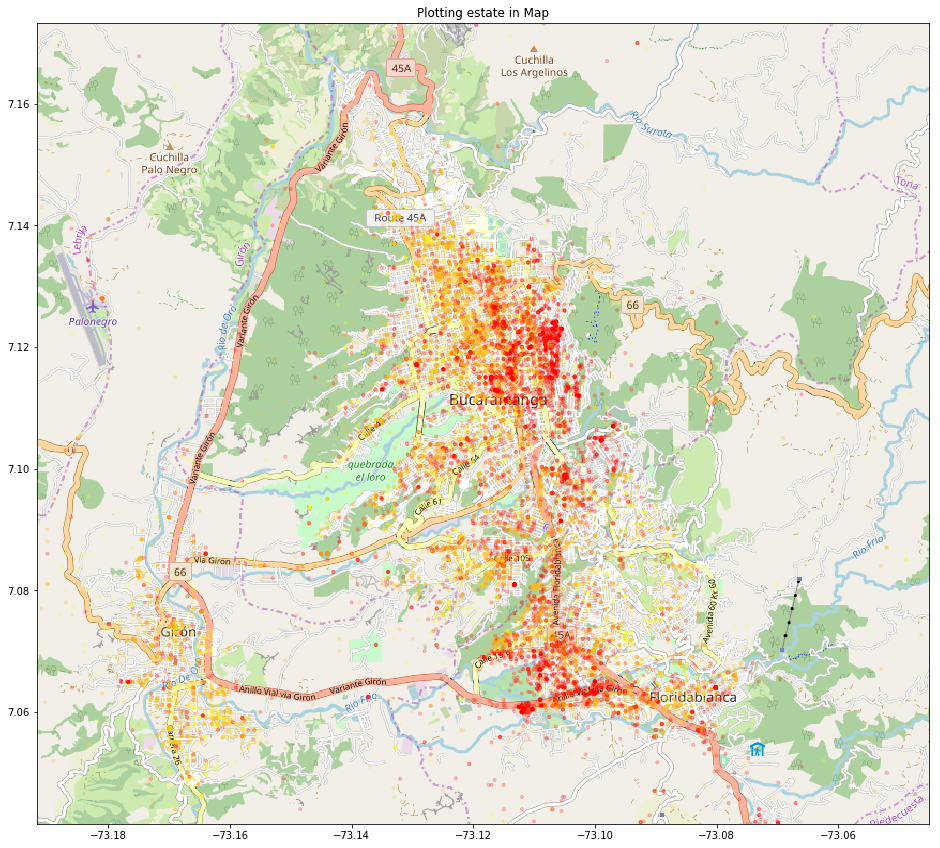

In [77]:
BBox = (-73.1918, -73.0450, 7.0416, 7.1733)
map4 = plt.imread('map4.png')
fig, ax = plt.subplots(figsize=(16,16))

ax.scatter(coordinates_price['longitude'], coordinates_price['latitude'], zorder=1, alpha=0.2, c=coordinates_price['color'], s=10)
ax.set_title('Plotting estate in Map')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])

ax.imshow(map4, zorder=0, extent=BBox, aspect='equal')